In [44]:
import numpy as np
import matplotlib.pyplot as plt

In [45]:
alpha = 2
beta = 0.7
gamma = 0.4

rho = 0.9
sigma = 0.5
nu = 1.5

In [46]:
def intraspecies_competition(x_0, y_0, observation):

    # modèle à temps discret du système proie-prédateur
    def new_prey_pop(x_n, y_n):
        return max(0, (alpha + 1)*x_n - beta * x_n * y_n - gamma * x_n**2)
    def new_pred_pop(x_n, y_n):
        return max(0, (1 - rho)*y_n + sigma * x_n * y_n - nu * y_n**2)
    
    # expression des points d'équilibre non nuls du système
    def equilibre():
        y_eq = (sigma*alpha - rho*gamma) / (beta + nu*gamma)
        x_eq = (alpha - beta*y_eq)/gamma
        return max(0, x_eq), max(0, y_eq)

    x_eq, y_eq = equilibre()
    Prey_eq = [x_eq]*len(observation)
    Pred_eq = [y_eq]*len(observation)

    Prey = [x_0]
    Pred = [y_0]
    for _ in observation[1::]:
        old_pop = Prey[-1], Pred[-1]
        Prey.append(new_prey_pop(old_pop[0], old_pop[1]))
        Pred.append(new_pred_pop(old_pop[0], old_pop[1]))
    
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
    ax1.plot(observation, Prey, label="prey")
    ax1.plot(observation, Pred, label="predator")
    ax1.plot(observation, Prey_eq)
    ax1.plot(observation, Pred_eq)
    ax1.legend()
    ax2.plot(Prey, Pred)
    ax2.set_title("Portrait de phase")
    plt.show()

    return x_eq, y_eq


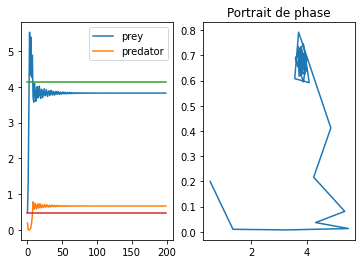

(4.138461538461538, 0.4923076923076922)


In [47]:
print(intraspecies_competition(0.5, 0.2, [i for i in range(200)]))